In [2]:
import pandas as pb
import matplotlib.pyplot as plt

In [3]:
df=pb.read_csv('data.csv')
df.head()

,Date,Category,Value,Product,Sales,Region
0,2023-01-01,A,28.0,Product1,754.0,East
1,2023-01-02,B,39.0,Product3,110.0,North
2,2023-01-03,C,32.0,Product2,398.0,East
3,2023-01-04,B,8.0,Product1,522.0,East
4,2023-01-05,B,26.0,Product3,869.0,North


In [4]:
df.describe()

,Value,Sales
count,47.000000,46.000000
mean,51.744681,557.130435
std,29.050532,274.598584
min,2.000000,108.000000
25%,27.500000,339.000000
50%,54.000000,591.500000
75%,70.000000,767.500000
max,99.000000,992.000000


In [5]:
# Renameing column
df.rename(columns={"Date":"Sale Date"}).head()

,Sale Date,Category,Value,Product,Sales,Region
0,2023-01-01,A,28.0,Product1,754.0,East
1,2023-01-02,B,39.0,Product3,110.0,North
2,2023-01-03,C,32.0,Product2,398.0,East
3,2023-01-04,B,8.0,Product1,522.0,East
4,2023-01-05,B,26.0,Product3,869.0,North


In [6]:
# New Row with some connection with Another Row

def square(n):
	return n**2

df["New Val"]=df['Value'].apply(square)
df.head()

,Date,Category,Value,Product,Sales,Region,New Val
0,2023-01-01,A,28.0,Product1,754.0,East,784.0
1,2023-01-02,B,39.0,Product3,110.0,North,1521.0
2,2023-01-03,C,32.0,Product2,398.0,East,1024.0
3,2023-01-04,B,8.0,Product1,522.0,East,64.0
4,2023-01-05,B,26.0,Product3,869.0,North,676.0


In [7]:
# Finding mis value
df.isnull().head()

,Date,Category,Value,Product,Sales,Region,New Val
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [8]:
df['Value'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: Value, dtype: bool

In [9]:
df.isnull().sum()

Date        0
Category    0
Value       3
Product     0
Sales       4
Region      0
New Val     3
dtype: int64

In [10]:
df.isnull().any()

Date        False
Category    False
Value        True
Product     False
Sales        True
Region      False
New Val      True
dtype: bool

In [11]:
# Fill missing value

df['fill_value']=df['Value'].fillna(df['Value'].mean())
df.head()

,Date,Category,Value,Product,Sales,Region,New Val,fill_value
0,2023-01-01,A,28.0,Product1,754.0,East,784.0,28.0
1,2023-01-02,B,39.0,Product3,110.0,North,1521.0,39.0
2,2023-01-03,C,32.0,Product2,398.0,East,1024.0,32.0
3,2023-01-04,B,8.0,Product1,522.0,East,64.0,8.0
4,2023-01-05,B,26.0,Product3,869.0,North,676.0,26.0


In [12]:
#  changeing datatype
df['fill_value'].astype(int).head()

0    28
1    39
2    32
3     8
4    26
Name: fill_value, dtype: int32

In [13]:
# Data Agregation and Grouping  , like SQL Group BY

mean_by_region=df.groupby('Region')['fill_value'].mean()
mean_by_region

Region
East     42.307692
North    40.226306
South    62.000000
West     61.041371
Name: fill_value, dtype: float64

<Axes: xlabel='Region'>

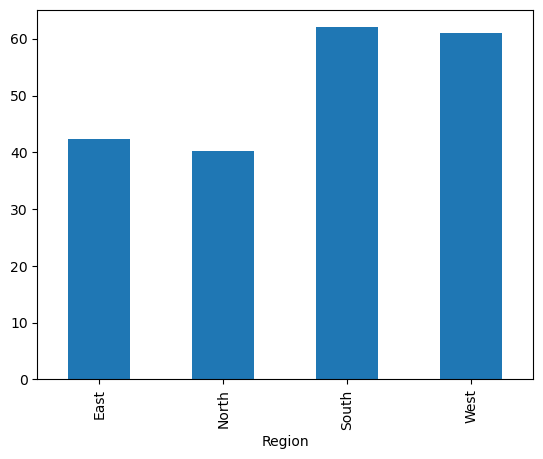

In [14]:
mean_by_region.plot(kind='bar')

<Axes: ylabel='Frequency'>

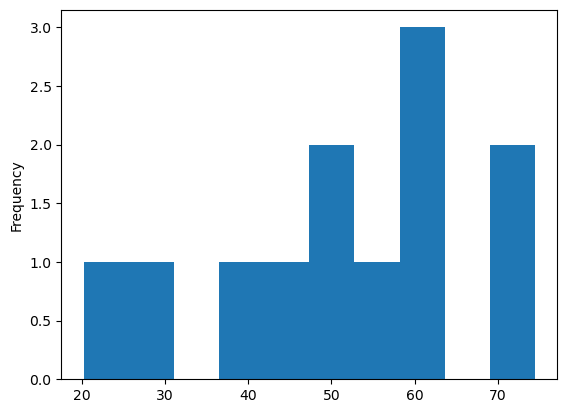

In [22]:
mean_by_region.plot(kind='hist')

<Axes: ylabel='fill_value'>

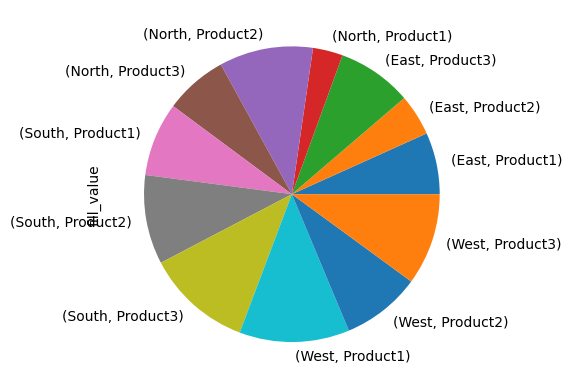

In [25]:
mean_by_region.plot(kind='pie')

In [15]:
mean_by_region=df.groupby(['Region','Product'])['fill_value'].mean().round(2)
mean_by_region

Region  Product 
East    Product1    41.71
        Product2    28.00
        Product3    50.50
North   Product1    20.25
        Product2    63.50
        Product3    42.46
South   Product1    50.00
        Product2    60.33
        Product3    71.67
West    Product1    74.44
        Product2    53.50
        Product3    62.17
Name: fill_value, dtype: float64

In [16]:

# Join , like SQL
df1 = pb.DataFrame({'Key': ['A', 'B', 'C'], 'Value1': [1, 2, 3]})
df2 = pb.DataFrame({'Key': ['A', 'B', 'D'], 'Value2': [4, 5, 6]})

In [17]:
df1

,Key,Value1
0,A,1
1,B,2
2,C,3


In [18]:
df2

,Key,Value2
0,A,4
1,B,5
2,D,6


In [19]:
df3=pb.merge(df1,df2,how="inner",on="Key")
df3

,Key,Value1,Value2
0,A,1,4
1,B,2,5


In [20]:
df3=pb.merge(df1,df2,how="left",on="Key")
df3

,Key,Value1,Value2
0,A,1,4.0
1,B,2,5.0
2,C,3,NaN


In [21]:
df3=pb.merge(df1,df2,how="right",on="Key")
df3

,Key,Value1,Value2
0,A,1.0,4
1,B,2.0,5
2,D,NaN,6
